In [2]:
!pip install spaCy
!pip install plotly
!pip install nbformat==5.4.0

In [189]:
# Import spacy
import spacy

# Install English language model
!spacy download nl_core_news_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 3.5 MB/s eta 0:00:04
      --------------------------------------- 0.3/12.8 MB 3.1 MB/s eta 0:00:05
     - -------------------------------------- 0.5/12.8 MB 4.0 MB/s eta 0:00:04
     - -------------------------------------- 0.6/12.8 MB 3.8 MB/s eta 0:00:04
     -- ------------------------------------- 0.9/12.8 MB 4.3 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 4.5 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/12.8 MB 4.3 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 4.3 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 4.4 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 4

In [190]:
# Create empty lists for file names and contents
texts = []
file_names = []

# Iterate through each file in the folder
for _file_name in os.listdir(r'C:\Users\bente\Documents\Master Groningen\Collecting Data\CD_A4\party_programs'):
# Look for only text files
    if _file_name.endswith('.txt'):
    # Append contents of each text file to text list
        texts.append(open(r'C:\Users\bente\Documents\Master Groningen\Collecting Data\CD_A4\party_programs' + '/' + _file_name, 'r', encoding='utf-8').read())
        # Append name of each file to file name list
        file_names.append(_file_name)

In [191]:
# Create a dictionary object associating each file name with its text
d = {'file_name':file_names,'Text':texts}

In [192]:
# Turn dictionary into a dataframe
program_df = pd.DataFrame(d)

In [193]:
#Test to see if every file has a text
program_df.head()

,file_name,Text
0,BBB.txt,Wat verwachten we van de overheid Wat verwacht...
1,D66.txt,"Een energieke economie: Klimaat, energie en on..."
2,FVD.txt,2. Democratische vernieuwing We geven macht t...
3,NSC.txt,Wat verwachten we van de overheid Wat verwacht...
4,PVDA_GL.txt,1. Meer zeggenschap en vertrouwen Ons ideaal: ...


In [194]:
# Remove extra spaces from meaningless punctuation such as '•', '●' and '▶'
program_df['Text'] = program_df['Text'].str.replace('•', ' ', regex=True).str.strip()
program_df['Text'] = program_df['Text'].str.replace('●', ' ', regex=True).str.strip()
program_df['Text'] = program_df['Text'].str.replace('▶', ' ', regex=True).str.strip()
# Remove .txt from title of each filename
program_df['file_name'] = program_df['file_name'].str.replace('.txt', '', regex=True)
program_df.head()

,file_name,Text
0,BBB,Wat verwachten we van de overheid Wat verwacht...
1,D66,"Een energieke economie: Klimaat, energie en on..."
2,FVD,2. Democratische vernieuwing We geven macht te...
3,NSC,Wat verwachten we van de overheid Wat verwacht...
4,PVDA_GL,1. Meer zeggenschap en vertrouwen Ons ideaal: ...


In [195]:
# Load metadata.
metadata_df = pd.read_csv('metadata_pp.csv')
metadata_df.head()

,file_name,party_name,left_right,current_seats_hop,percent_votes
0,BBB,Boeren Burger Beweging,right_wing,7,4.6
1,D66,Democraten 66,left_wing,9,6.3
2,FVD,Forum voor Democratie,right_wing,3,2.2
3,NSC,Nieuw Sociaal Contract,right_wing,20,12.8
4,PVDA_GL,Partij van de Arbeid en GroenLinks,left_wing,25,15.8


In [196]:
# Merge metadata and party programs into new DataFrame
parties_df = metadata_df.merge(program_df,on='file_name')

In [197]:
parties_df.head()

,file_name,party_name,left_right,current_seats_hop,percent_votes,Text
0,BBB,Boeren Burger Beweging,right_wing,7,4.6,Wat verwachten we van de overheid Wat verwacht...
1,D66,Democraten 66,left_wing,9,6.3,"Een energieke economie: Klimaat, energie en on..."
2,FVD,Forum voor Democratie,right_wing,3,2.2,2. Democratische vernieuwing We geven macht te...
3,NSC,Nieuw Sociaal Contract,right_wing,20,12.8,Wat verwachten we van de overheid Wat verwacht...
4,PVDA_GL,Partij van de Arbeid en GroenLinks,left_wing,25,15.8,1. Meer zeggenschap en vertrouwen Ons ideaal: ...


#### Creating doc objects and text enrichtment

In [198]:
# Load nlp pipeline
nlp = spacy.load('nl_core_news_sm')
# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [199]:
#Define example sentence in Ducth
sentence = "Dit is een voorbeeld? zin"

# Call the nlp model on the sentence
doc = nlp(sentence)

In [200]:
# Loop through each token in doc object
for token in doc:
    # Print text and part of speech for each
    print(token.text, token.pos_)

Dit PRON
is AUX
een DET
voorbeeld NOUN
? PUNCT
zin NOUN


In [201]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [202]:
# Apply the function to the "Text" column, so that the nlp pipeline is called on each party program
parties_df['Doc'] = parties_df['Text'].apply(process_text)

#### tokenization

In [203]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [204]:
# Run the token retrieval function on the doc objects in the dataframe
parties_df['Tokens'] = parties_df['Doc'].apply(get_token)
parties_df

,file_name,party_name,left_right,current_seats_hop,percent_votes,Text,Doc,Tokens
0,BBB,Boeren Burger Beweging,right_wing,7,4.6,Wat verwachten we van de overheid Wat verwacht...,"(Wat, verwachten, we, van, de, overheid, Wat, ...","[Wat, verwachten, we, van, de, overheid, Wat, ..."
1,D66,Democraten 66,left_wing,9,6.3,"Een energieke economie: Klimaat, energie en on...","(Een, energieke, economie, :, Klimaat, ,, ener...","[Een, energieke, economie, :, Klimaat, ,, ener..."
2,FVD,Forum voor Democratie,right_wing,3,2.2,2. Democratische vernieuwing We geven macht te...,"(2, ., Democratische, vernieuwing, We, geven, ...","[2, ., Democratische, vernieuwing, We, geven, ..."
3,NSC,Nieuw Sociaal Contract,right_wing,20,12.8,Wat verwachten we van de overheid Wat verwacht...,"(Wat, verwachten, we, van, de, overheid, Wat, ...","[Wat, verwachten, we, van, de, overheid, Wat, ..."
4,PVDA_GL,Partij van de Arbeid en GroenLinks,left_wing,25,15.8,1. Meer zeggenschap en vertrouwen Ons ideaal: ...,"(1, ., Meer, zeggenschap, en, vertrouwen, Ons,...","[1, ., Meer, zeggenschap, en, vertrouwen, Ons,..."
5,PVDD,Partij van de dieren,left_wing,3,2.3,1. Een leefbare Aarde De klimaat- en natuurcri...,"(1, ., Een, leefbare, Aarde, De, klimaat-, en,...","[1, ., Een, leefbare, Aarde, De, klimaat-, en,..."
6,PVV,Partij van de vrijheid,right_wing,37,23.5,ASIEL EN IMMIGRATIE Ons mooie Nederland is doo...,"(ASIEL, EN, IMMIGRATIE, Ons, mooie, Nederland,...","[ASIEL, EN, IMMIGRATIE, Ons, mooie, Nederland,..."
7,SGP,De Staatkundig Gereformeerde Partij,right_wing,3,2.1,1sgp.nl/verkiezingen 5 VOOR VRIJHEDEN EN GOED...,"(1sgp.nl/verkiezingen, 5, VOOR, VRIJHEDEN, EN,...","[1sgp.nl/verkiezingen, 5, VOOR, VRIJHEDEN, EN,..."
8,SP,Socialistische Partij,left_wing,5,3.1,ONS VERHAAL Op 22 november bepaalt de kiezer w...,"(ONS, VERHAAL, Op, 22, november, bepaalt, de, ...","[ONS, VERHAAL, Op, 22, november, bepaalt, de, ..."
9,VVD,De Volkspartij voor Vrijheid en Democratie,right_wing,24,15.2,"1 Vrij, veilig, welvarend Wij Nederlanders zij...","(1, Vrij, ,, veilig, ,, welvarend, Wij, Nederl...","[1, Vrij, ,, veilig, ,, welvarend, Wij, Nederl..."


### Representation
#### Although I have chosen to use 4 left-wing parties and 6 right-wing parties, it is important to note that the left is overrepresented in terms of the amount of text. This is because D66 had a longer party programme than other parties. The amount of tokens per party are visible below.

In [205]:
#I created variables for the total amount of tokens in a party program 
left_tokens = 0
right_tokens = 0
#I then iterated over the rows to get the length of tokens per party program and divided them into left-wing and right-wing
for index, row in parties_df.iterrows():
    party_name = row['party_name']
    left_right = row['left_right']
    tokens_len = len(row['Tokens'])

    if left_right == 'left_wing':
        left_tokens += tokens_len
    else:
        right_tokens += tokens_len

print(f'The left-wing parties are represented by {left_tokens} tokens.')
print(f'The right-wing parties are represented by {right_tokens} tokens.')

The left-wing parties are represented by 201992 tokens.
The right-wing parties are represented by 168439 tokens.


In [206]:
#To show the amount of tokens per party I made a datafram with the partyname, whether they are left- or right-wing and how many tokens were in the party program.
party_tokens=parties_df['party_name'],parties_df['left_right'], parties_df['Tokens'].str.len()
token_length_df=pd.DataFrame(data=party_tokens)
token_length_df

,0,1,2,3,4,5,6,7,8,9
party_name,Boeren Burger Beweging,Democraten 66,Forum voor Democratie,Nieuw Sociaal Contract,Partij van de Arbeid en GroenLinks,Partij van de dieren,Partij van de vrijheid,De Staatkundig Gereformeerde Partij,Socialistische Partij,De Volkspartij voor Vrijheid en Democratie
left_right,right_wing,left_wing,right_wing,right_wing,left_wing,left_wing,right_wing,right_wing,left_wing,right_wing
Tokens,56762,83120,16347,36597,53575,52856,8167,9727,12441,40839


In [207]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
parties_df['Lemmas'] = parties_df['Doc'].apply(get_lemma)

### Text annotation
#### Part-Of-Speech tagging

In [208]:
# Define a function to retrieve lemmas from a doc object
def get_pos(doc):
    #Return the coarse- and fine-grained part of speech text for each token in the doc
    return [(token.pos_, token.tag_) for token in doc]

# Define a function to retrieve parts of speech from a doc object
parties_df['POS'] = parties_df['Doc'].apply(get_pos)

In [209]:
# Create a list of part of speech tags
list(parties_df['POS'])

[[('PRON', 'VNW|vb|pron|stan|vol|3o|ev'),
  ('VERB', 'WW|pv|tgw|mv'),
  ('PRON', 'VNW|pers|pron|nomin|red|1|mv'),
  ('ADP', 'VZ|init'),
  ('DET', 'LID|bep|stan|rest'),
  ('NOUN', 'N|soort|ev|basis|zijd|stan'),
  ('PRON', 'VNW|vb|pron|stan|vol|3o|ev'),
  ('VERB', 'WW|pv|tgw|mv'),
  ('PRON', 'VNW|pers|pron|nomin|red|1|mv'),
  ('ADP', 'VZ|init'),
  ('DET', 'LID|bep|stan|rest'),
  ('NOUN', 'N|soort|ev|basis|zijd|stan'),
  ('SPACE', '_SP'),
  ('NOUN', 'N|soort|ev|basis|onz|stan'),
  ('PRON', 'VNW|betr|pron|stan|vol|3|ev'),
  ('VERB', 'WW|pv|tgw|met-t'),
  ('ADP', 'VZ|init'),
  ('DET', 'LID|bep|stan|rest'),
  ('NOUN', 'N|soort|mv|basis'),
  ('CCONJ', 'VG|neven'),
  ('NOUN', 'N|soort|mv|basis'),
  ('ADP', 'VZ|init'),
  ('DET', 'LID|bep|stan|rest'),
  ('NOUN', 'N|soort|ev|basis|zijd|stan'),
  ('PUNCT', 'LET'),
  ('DET', 'LID|bep|stan|rest'),
  ('NOUN', 'N|soort|ev|basis|zijd|stan'),
  ('ADJ', 'ADJ|vrij|basis|zonder'),
  ('VERB', 'WW|pv|tgw|met-t'),
  ('CCONJ', 'VG|neven'),
  ('DET', 'LID|bep|s

In [210]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [211]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
parties_df['Named_Entities'] = parties_df['Doc'].apply(extract_named_entities)
parties_df['Named_Entities']

0    [GPE, DATE, CARDINAL, NORP, GPE, PERSON, PERSO...
1    [GPE, GPE, ORG, ORG, PERCENT, DATE, DATE, DATE...
2    [CARDINAL, NORP, GPE, PERSON, CARDINAL, LAW, C...
3    [GPE, DATE, CARDINAL, NORP, GPE, PERSON, PERSO...
4    [CARDINAL, ORDINAL, PERSON, WORK_OF_ART, GPE, ...
5    [CARDINAL, NORP, ORG, ORDINAL, NORP, QUANTITY,...
6    [GPE, MONEY, GPE, GPE, GPE, GPE, ORG, EVENT, N...
7    [DATE, CARDINAL, ORG, PERSON, ORG, CARDINAL, G...
8    [ORG, DATE, ORG, GPE, ORG, CARDINAL, GPE, ORG,...
9    [CARDINAL, NORP, PERSON, NORP, DATE, DATE, GPE...
Name: Named_Entities, dtype: object

In [212]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
parties_df['NE_Words'] = parties_df['Doc'].apply(extract_named_entities)
parties_df['NE_Words']

0    [(on), (2023), (7), (Inhoudsopgaveteweegbrenge...
1    [(Nederland), (Nederland), (DOEN), (WE), (60, ...
2    [(2), (Democratische), (Zwitsers), (Publieke),...
3    [(on), (2023), (7), (Inhoudsopgaveteweegbrenge...
4    [(1), (eerste), (juist), (Het, goede, nieuws, ...
5    [(1), (Aarde), (Partij, voor, de, Dieren), (ee...
6    [(Nederland), (1, miljoen, niet-westerse, allo...
7    [(1sgp.nl/verkiezingen), (5), (VOOR), (EN,  , ...
8    [(ONS), (22, november), (anders, gaan, doen, o...
9    [(1), (Nederlanders), (ambitieus), (liberale),...
Name: NE_Words, dtype: object

In [213]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
parties_df['NE_Words'] = parties_df['Doc'].apply(extract_named_entities)
parties_df['NE_Words']

0    [(on), (2023), (7), (Inhoudsopgaveteweegbrenge...
1    [(Nederland), (Nederland), (DOEN), (WE), (60, ...
2    [(2), (Democratische), (Zwitsers), (Publieke),...
3    [(on), (2023), (7), (Inhoudsopgaveteweegbrenge...
4    [(1), (eerste), (juist), (Het, goede, nieuws, ...
5    [(1), (Aarde), (Partij, voor, de, Dieren), (ee...
6    [(Nederland), (1, miljoen, niet-westerse, allo...
7    [(1sgp.nl/verkiezingen), (5), (VOOR), (EN,  , ...
8    [(ONS), (22, november), (anders, gaan, doen, o...
9    [(1), (Nederlanders), (ambitieus), (liberale),...
Name: NE_Words, dtype: object

In [214]:
# Extract the first Doc object
doc = parties_df['Doc'][1]

# Visualize named entity tagging in a single paper
displacy.render(doc, style='ent', jupyter=True)

In [216]:
# Create doc object from single sentence
doc = nlp("Dit is een voorbeeld? zin")

# Print counts of each part of speech in sentence
print(doc.count_by(spacy.attrs.POS))

{95: 1, 87: 1, 90: 1, 92: 2, 97: 1}


In [217]:
# Store dictionary with indexes and POS counts in a variable
num_pos = doc.count_by(spacy.attrs.POS)

dictionary = {}

# Create a new dictionary which replaces the index of each part of speech for its label (NOUN, VERB, ADJECTIVE)
for k,v in sorted(num_pos.items()):
  dictionary[doc.vocab[k].text] = v

dictionary

{'AUX': 1, 'DET': 1, 'NOUN': 2, 'PRON': 1, 'PUNCT': 1}

In [218]:
# Create new DataFrame for analysis purposes
pos_analysis_df = parties_df[['file_name','party_name', 'Doc']]

# Create list to store each dictionary
num_list = []

# Define a function to get part of speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

# Apply function to each doc object in DataFrame
pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

In [219]:
# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

# Add discipline of each paper as new column to dataframe
idx = 0
new_col = pos_analysis_df['party_name']
pos_counts.insert(loc=idx, column='party_name', value=new_col)

pos_counts

,party_name,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X,SPACE
0,Boeren Burger Beweging,4967,8388,2416,2463,2578,6118,1.0,12342,404,2587,1672,5155,831,274,5763,20.0,783
1,Democraten 66,7571,12368,4009,2920,3255,8318,NaN,17861,982,4355,2490,7429,1213,215,8725,4.0,1405
2,Forum voor Democratie,1409,2247,792,607,556,1507,NaN,3634,244,707,572,1839,199,118,1542,9.0,365
3,Nieuw Sociaal Contract,3214,5528,1448,1593,1647,4012,NaN,8213,287,1636,667,3311,492,142,3750,12.0,645
4,Partij van de Arbeid en GroenLinks,5047,8091,2369,1480,2408,5340,NaN,11876,330,3094,1292,4937,805,308,5760,3.0,435
5,Partij van de dieren,4685,7411,2799,2211,2465,5435,4.0,11564,325,2052,971,5082,744,250,5755,4.0,1099
6,Partij van de vrijheid,689,989,514,357,325,853,2.0,1639,77,476,349,726,120,42,809,3.0,197
7,De Staatkundig Gereformeerde Partij,853,1332,591,474,423,995,NaN,2049,68,430,315,1022,176,38,919,NaN,42
8,Socialistische Partij,993,1737,716,544,521,1358,NaN,2640,89,768,238,1160,181,19,1361,2.0,114
9,De Volkspartij voor Vrijheid en Democratie,3613,5824,2180,1668,1596,3753,NaN,8124,201,2878,843,3856,705,101,4982,6.0,509


In [220]:
# Get average part of speech counts used in each party program
average_pos_df = pos_counts.groupby(['party_name']).mean()

# Round calculations to the nearest whole number
average_pos_df = average_pos_df.round(0)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

# Show dataframe
average_pos_df

,party_name,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X,SPACE
0,Boeren Burger Beweging,4967.0,8388.0,2416.0,2463.0,2578.0,6118.0,1.0,12342.0,404.0,2587.0,1672.0,5155.0,831.0,274.0,5763.0,20.0,783.0
1,De Staatkundig Gereformeerde Partij,853.0,1332.0,591.0,474.0,423.0,995.0,NaN,2049.0,68.0,430.0,315.0,1022.0,176.0,38.0,919.0,NaN,42.0
2,De Volkspartij voor Vrijheid en Democratie,3613.0,5824.0,2180.0,1668.0,1596.0,3753.0,NaN,8124.0,201.0,2878.0,843.0,3856.0,705.0,101.0,4982.0,6.0,509.0
3,Democraten 66,7571.0,12368.0,4009.0,2920.0,3255.0,8318.0,NaN,17861.0,982.0,4355.0,2490.0,7429.0,1213.0,215.0,8725.0,4.0,1405.0
4,Forum voor Democratie,1409.0,2247.0,792.0,607.0,556.0,1507.0,NaN,3634.0,244.0,707.0,572.0,1839.0,199.0,118.0,1542.0,9.0,365.0
5,Nieuw Sociaal Contract,3214.0,5528.0,1448.0,1593.0,1647.0,4012.0,NaN,8213.0,287.0,1636.0,667.0,3311.0,492.0,142.0,3750.0,12.0,645.0
6,Partij van de Arbeid en GroenLinks,5047.0,8091.0,2369.0,1480.0,2408.0,5340.0,NaN,11876.0,330.0,3094.0,1292.0,4937.0,805.0,308.0,5760.0,3.0,435.0
7,Partij van de dieren,4685.0,7411.0,2799.0,2211.0,2465.0,5435.0,4.0,11564.0,325.0,2052.0,971.0,5082.0,744.0,250.0,5755.0,4.0,1099.0
8,Partij van de vrijheid,689.0,989.0,514.0,357.0,325.0,853.0,2.0,1639.0,77.0,476.0,349.0,726.0,120.0,42.0,809.0,3.0,197.0
9,Socialistische Partij,993.0,1737.0,716.0,544.0,521.0,1358.0,NaN,2640.0,89.0,768.0,238.0,1160.0,181.0,19.0,1361.0,2.0,114.0


### Visualisations
#### Once one has completed processing the text, it is possible to visualise the extra data gained by tagging POS or Named Entities.
#### Without reading all the party programs, one can now identify which party talks most about dates and persons. It is also interesting to research which party uses more verbs, nouns or adjectives.

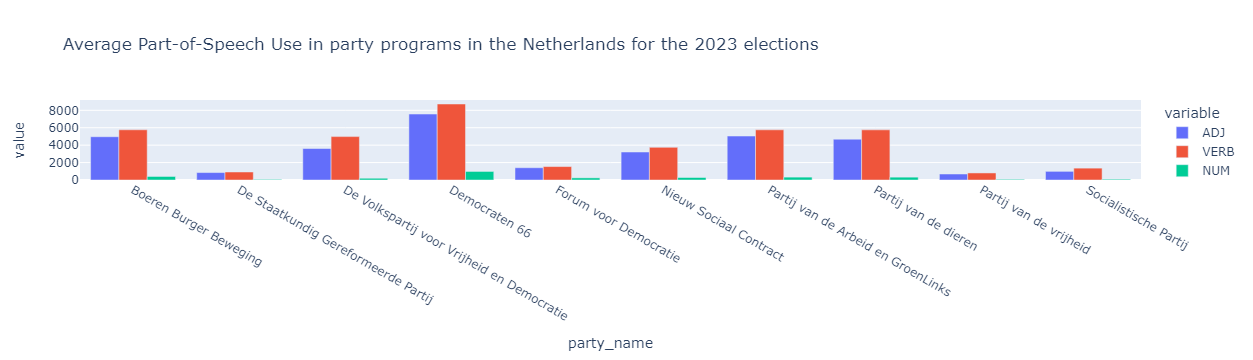

In [221]:
# Use plotly to plot proper noun use per party
fig = px.bar(average_pos_df, x="party_name", y=["ADJ", 'VERB', "NUM"], title="Average Part-of-Speech Use in party programs in the Netherlands for the 2023 elections", barmode='group')
fig.show()

In [222]:
# Create new DataFrame for analysis purposes
ner_analysis_df = parties_df[['file_name','party_name', 'Named_Entities', 'NE_Words']]

In [173]:
ner_analysis_df

,file_name,party_name,Named_Entities,NE_Words
0,BBB,Boeren Burger Beweging,"[GPE, DATE, CARDINAL, NORP, GPE, PERSON, PERSO...","[(on), (2023), (7), (Inhoudsopgaveteweegbrenge..."
1,D66,Democraten 66,"[GPE, GPE, ORG, ORG, PERCENT, DATE, DATE, DATE...","[(Nederland), (Nederland), (DOEN), (WE), (60, ..."
2,FVD,Forum voor Democratie,"[CARDINAL, NORP, GPE, PERSON, CARDINAL, LAW, C...","[(2), (Democratische), (Zwitsers), (Publieke),..."
3,NSC,Nieuw Sociaal Contract,"[GPE, DATE, CARDINAL, NORP, GPE, PERSON, PERSO...","[(on), (2023), (7), (Inhoudsopgaveteweegbrenge..."
4,PVDA_GL,Partij van de Arbeid en GroenLinks,"[CARDINAL, ORDINAL, PERSON, WORK_OF_ART, GPE, ...","[(1), (eerste), (juist), (Het, goede, nieuws, ..."
5,PVDD,Partij van de dieren,"[CARDINAL, NORP, ORG, ORDINAL, NORP, QUANTITY,...","[(1), (Aarde), (Partij, voor, de, Dieren), (ee..."
6,PVV,Partij van de vrijheid,"[GPE, MONEY, GPE, GPE, GPE, GPE, ORG, EVENT, N...","[(Nederland), (1, miljoen, niet-westerse, allo..."
7,SGP,De Staatkundig Gereformeerde Partij,"[DATE, CARDINAL, ORG, PERSON, ORG, CARDINAL, G...","[(1sgp.nl/verkiezingen), (5), (VOOR), (EN, , ..."
8,SP,Socialistische Partij,"[ORG, DATE, ORG, GPE, ORG, CARDINAL, GPE, ORG,...","[(ONS), (22, november), (anders, gaan, doen, o..."
9,VVD,De Volkspartij voor Vrijheid en Democratie,"[CARDINAL, NORP, PERSON, NORP, DATE, DATE, GPE...","[(1), (Nederlanders), (ambitieus), (liberale),..."


In [175]:
# Convert named entity lists to strings so we can count specific entities
ner_analysis_df['Named_Entities'] = ner_analysis_df['Named_Entities'].apply(lambda x: ' '.join(x))


In [182]:
# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
loc_counts = ner_analysis_df['Named_Entities'].str.count('LOC')
date_counts = ner_analysis_df['Named_Entities'].str.count('DATE')
woa_counts = ner_analysis_df['Named_Entities'].str.count('WORK_OF_ART')

# Append named entity counts to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Party'] = ner_analysis_df["party_name"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['LOC_Counts'] = loc_counts
ner_counts_df['DATE_Counts'] = date_counts
ner_counts_df['WORK_OF_ART_Counts'] = woa_counts

ner_counts_df.head()

,Party,PERSON_Counts,LOC_Counts,DATE_Counts,WORK_OF_ART_Counts
0,Boeren Burger Beweging,155,27,218,11
1,Democraten 66,183,30,631,123
2,Forum voor Democratie,49,7,55,9
3,Nieuw Sociaal Contract,61,16,128,6
4,Partij van de Arbeid en GroenLinks,149,46,205,14


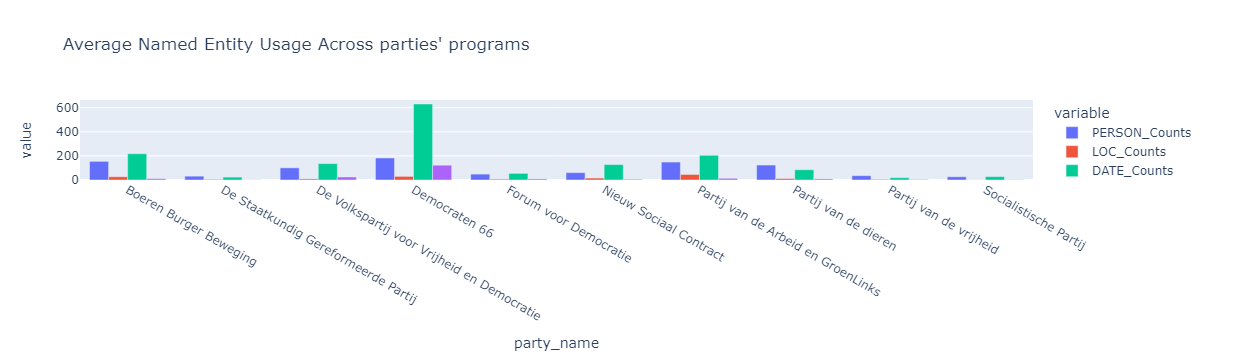

In [95]:
# Calculate average usage of each named entity type
average_ner_df = ner_counts_df.groupby(['party_name']).mean()
average_ner_df = average_ner_df.round(0)
average_ner_df = average_ner_df.reset_index()
average_ner_df

# Use plotly to plot proper noun use per party
fig = px.bar(average_ner_df, x="party_name", y=["PERSON_Counts", 'LOC_Counts', "DATE_Counts", 'WORK_OF_ART_Counts'], title="Average Named Entity Usage Across parties' programs", barmode='group')
fig.show()

In [215]:
# Save DataFrame as csv 
# Use this step only to save csv to your computer's working directory
parties_df.to_csv('Party_programs_with_spaCy_tags.csv')

PermissionError: [Errno 13] Permission denied: 'Party_programs_with_spaCy_tags.csv'